* PATHL=/home/asif/Code/Godhuli/superstore_sales_analysis/Data/superstore.csv
* PATHW=/superstore_sales_analysis/Data/superstore.csv
* Dataset link = https://www.kaggle.com/datasets/zafarali27/car-price-prediction

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

In [2]:
df = pd.read_csv('./Data/car_price_prediction_.csv')

In [3]:
df.head()

Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


<Axes: >

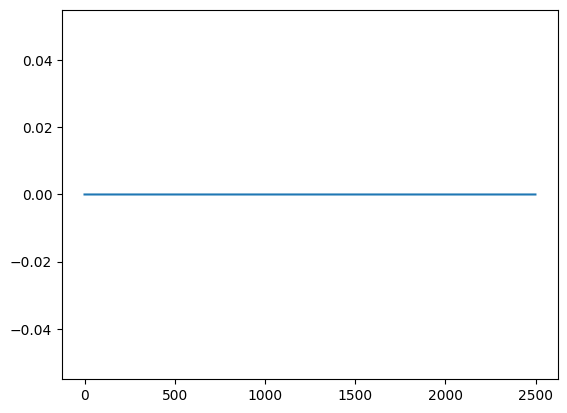

In [5]:
df.isnull().sum(axis=1).plot()

In [6]:
df.describe()

Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000

In [7]:
# Checking for Duplicates
if df.duplicated().sum() > 0:
    print("Duplicate exits")
else:
    print("No duplicates")

No duplicates


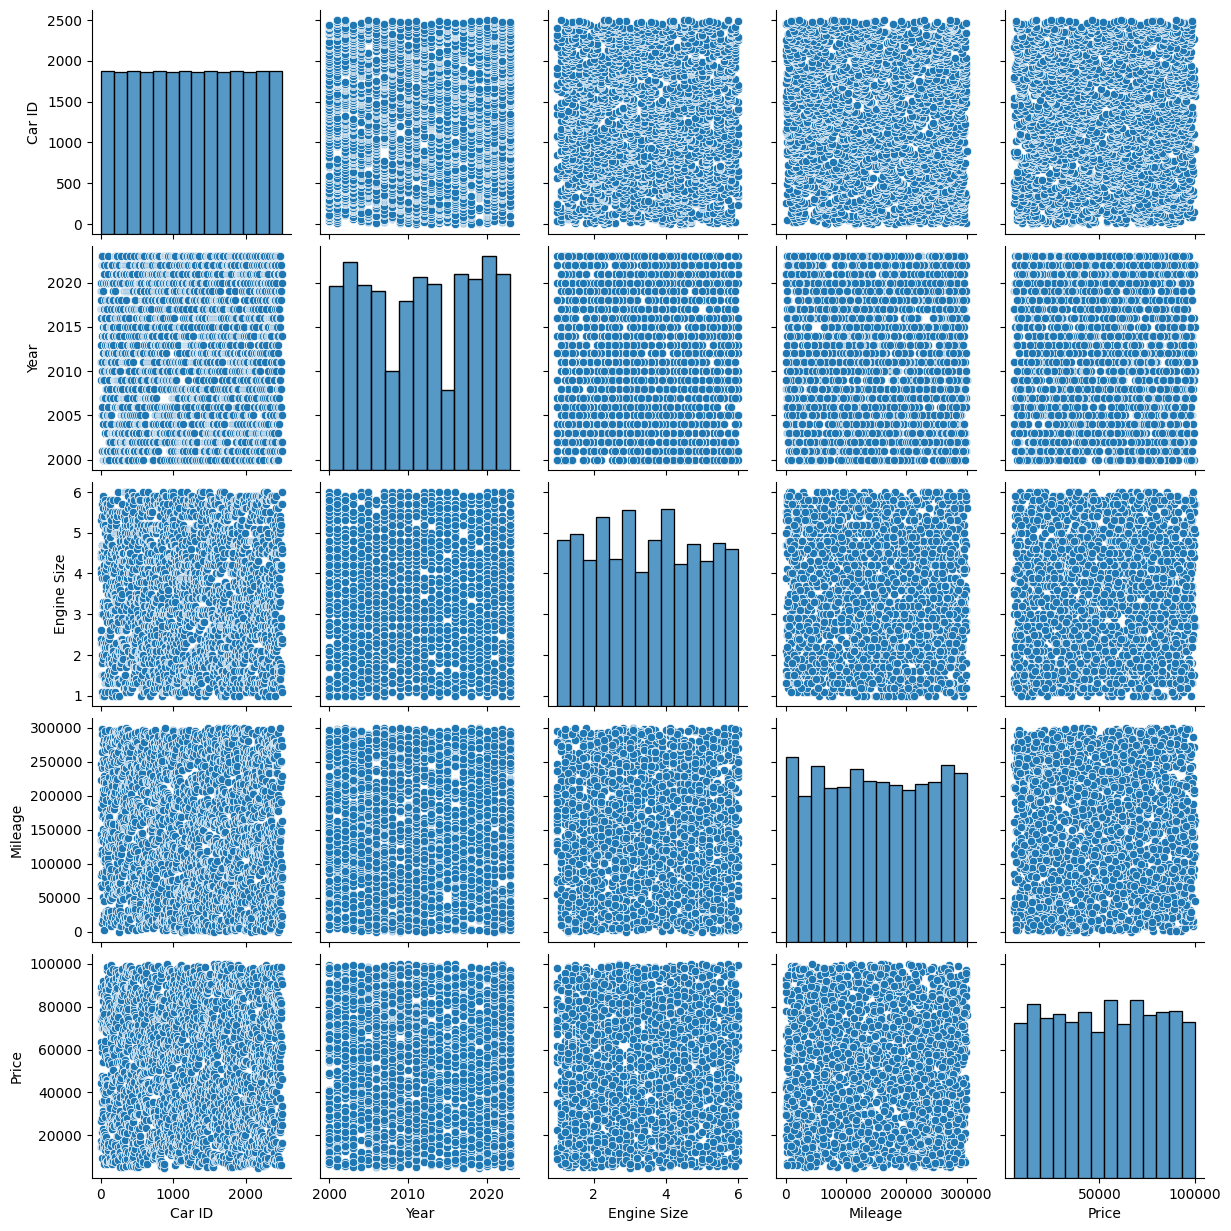

In [8]:
sns.pairplot(df)

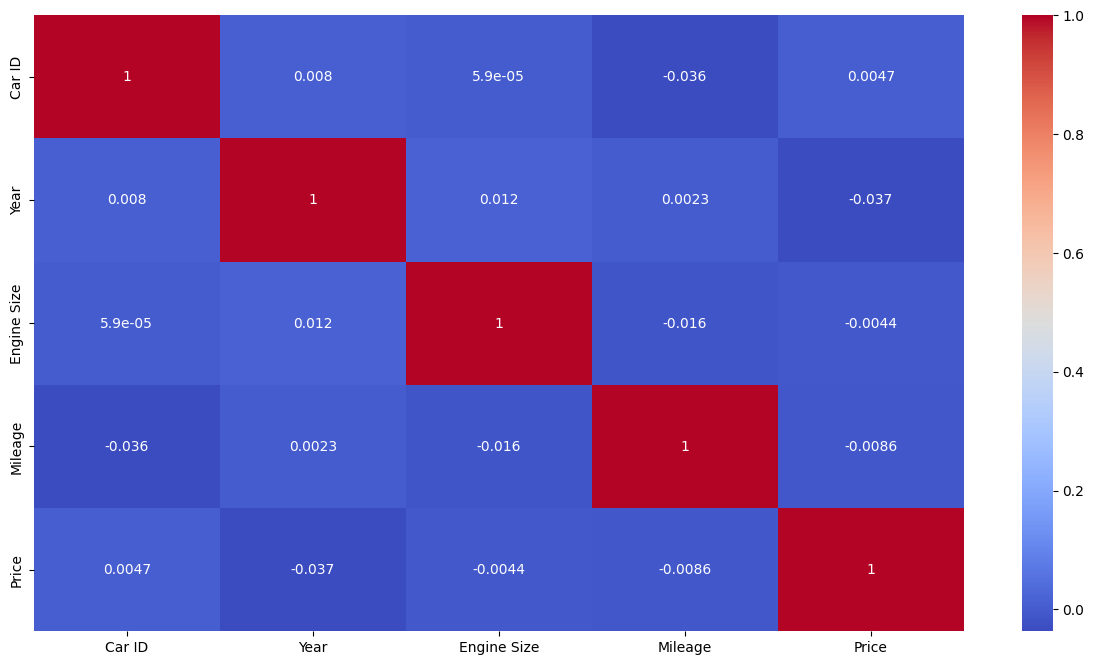

In [9]:
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [10]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [11]:
brands = df['Brand'].unique()
fuel_type = df['Fuel Type'].unique()
transmission = df['Transmission'].unique()
condittion = df['Condition'].unique()
model = df['Model'].unique()
print(f'Brands:', brands)
print(f'Fuel Tye:',fuel_type)
print(f'Transmission:',transmission)
print(f'Condition:',condittion)
print(f'Model:',model)

Brands: ['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']
Fuel Tye: ['Petrol' 'Electric' 'Diesel' 'Hybrid']
Transmission: ['Manual' 'Automatic']
Condition: ['New' 'Used' 'Like New']
Model: ['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus']


# Understanding the features of the dataset

* Brand and Model: How different brands and models of cars affect the price?
* Are luxury brands more expensive?
* Year of Manufacture: How does the year of manufacture affect the price?
* Are there any notable trends for specifoc brands?
* Engine Size: How does the engine size affect the price? Does a larger engine size mean a higher price? how does the engine size affect the price for different brands, fuel types? 
* Mileage: How does the mileage affect the price? Does a higher mileage mean a lower price?
* Fuel Type: How does the fuel type affect the price? Are diesel cars more expensive than petrol cars? Are electric cars priced hgher due to their tecnology, or do they vary based on other factors?
* Transmission: How does the transmission type affect the price? Are automatic cars more expensive than manual cars?

### Price

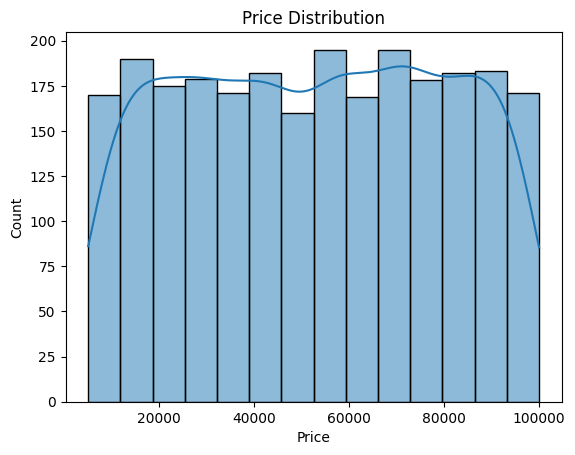

In [12]:
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

There isn't a clear pick or central tendency in the distribution. There could be a large number of outliers spread across the range of prices.So we will check for outliers in the price column.

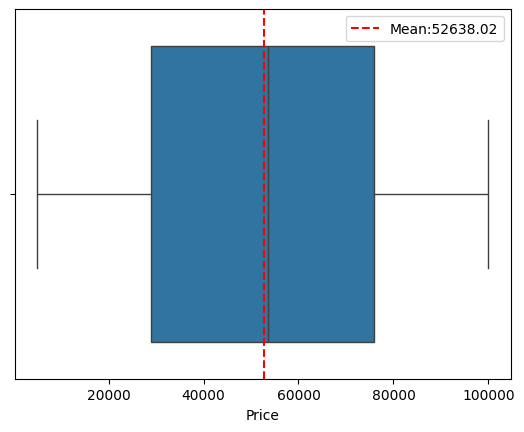

In [13]:
sns.boxplot(x=df['Price'])
mean_price = df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean:{mean_price:.2f}')

plt.legend()
plt.show()

In [14]:
from scipy import stats

z_scores = stats.zscore(df["Price"])
abs_z_scores = abs(z_scores)
outliers = abs_z_scores > 3  # Threshold of 3
outliers_df = df[outliers]
print(outliers_df)  # This will show any outliers

Empty DataFrame
Columns: [Car ID, Brand, Year, Engine Size, Fuel Type, Transmission, Mileage, Condition, Price, Model]
Index: []


Apparantly, the price columns has no outliers.

## Brand and Model

In [15]:
brands

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

  Types of Brand         Price
1            BMW  54157.114385
5          Tesla  53475.547471
4       Mercedes  53191.090085
6         Toyota  52078.728235
3          Honda  52050.283949
0           Audi  51953.424810
2           Ford  51593.254813


<BarContainer object of 7 artists>

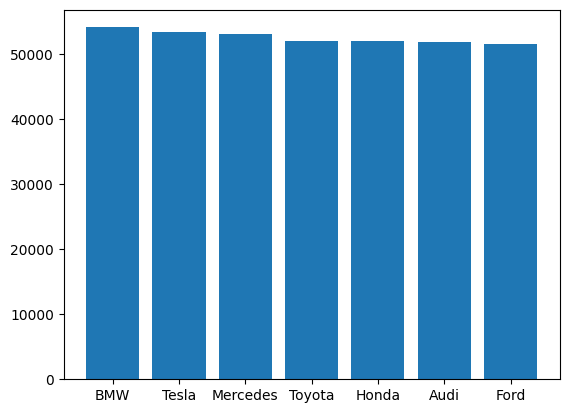

In [16]:
price_per_brand = df.groupby('Brand',observed=True)['Price'].mean().reset_index()
price_per_brand = price_per_brand.rename(columns={'Brand':'Types of Brand'})
price_per_brand = price_per_brand.sort_values(by='Price',ascending=False)

print(price_per_brand)

plt.bar(price_per_brand['Types of Brand'], price_per_brand['Price'])

BMW is the most expensive brand, followed by Tesla ans Mercedes. Ford is the cheapest brand.

In [17]:
price_by_model = (df.groupby(["Brand","Model"], observed=True)["Price"].mean().reset_index())
price_by_model= price_by_model.sort_values(by='Price',ascending=False)

print(price_by_model)

       Brand     Model         Price
19  Mercedes       GLC  59544.773750
4        BMW  3 Series  58561.123548
24    Toyota     Camry  56405.516111
5        BMW  5 Series  55986.422796
10      Ford     Focus  55677.760000
15     Honda       Fit  55369.341236
20     Tesla   Model 3  55142.083563
23     Tesla   Model Y  54708.899101
25    Toyota   Corolla  53782.605534
2       Audi        Q5  53432.295949
16  Mercedes   C-Class  53080.840761
21     Tesla   Model S  52887.345823
12     Honda    Accord  52799.983523
3       Audi        Q7  52594.554211
8       Ford  Explorer  52117.953953
1       Audi        A4  51554.915000
17  Mercedes   E-Class  51358.704157
9       Ford    Fiesta  51313.160777
27    Toyota      RAV4  51248.733636
22     Tesla   Model X  51235.880753
6        BMW        X3  51021.077391
0       Audi        A3  50530.147551
7        BMW        X5  50517.325250
13     Honda      CR-V  50046.228316
14     Honda     Civic  49912.979250
18  Mercedes       GLA  49549.031304
1

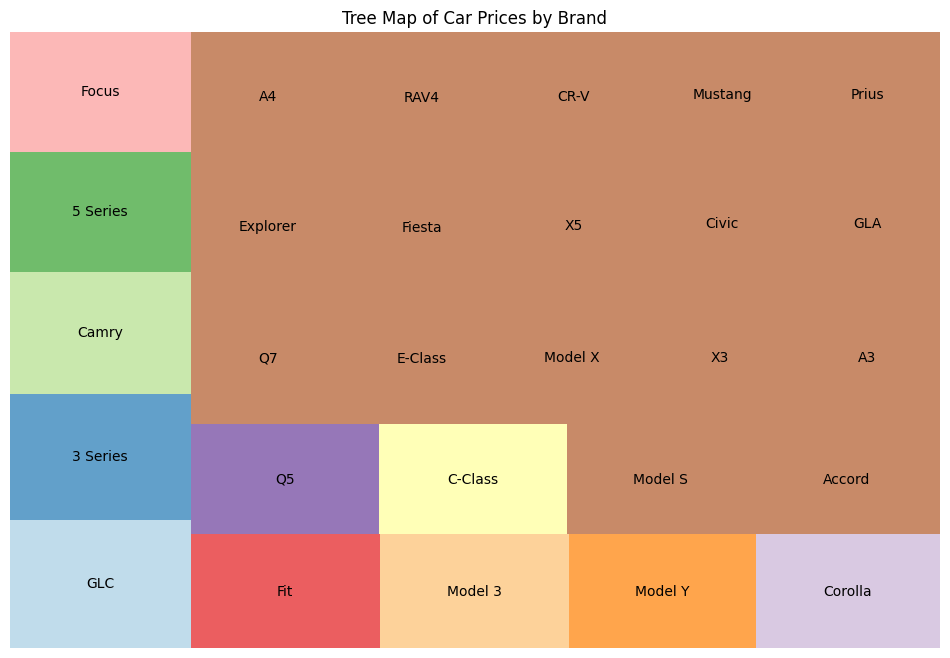

In [18]:
import squarify

plt.figure(figsize=(12,8))
squarify.plot(sizes=price_by_model['Price'], label=price_by_model['Model'],  alpha=0.7, color=plt.cm.Paired(range(len(price_by_model))))
plt.title('Tree Map of Car Prices by Brand')
plt.axis('off')
plt.show()

BMW ranks as a top luxury brand with high price, but the cost varies by model. The Mercedes' GLC is the pricest model in the dataset, while BMW's 3 seires is priced slightly lower, illustrating how model-specific influence car pricing.

## Year of Manufacture

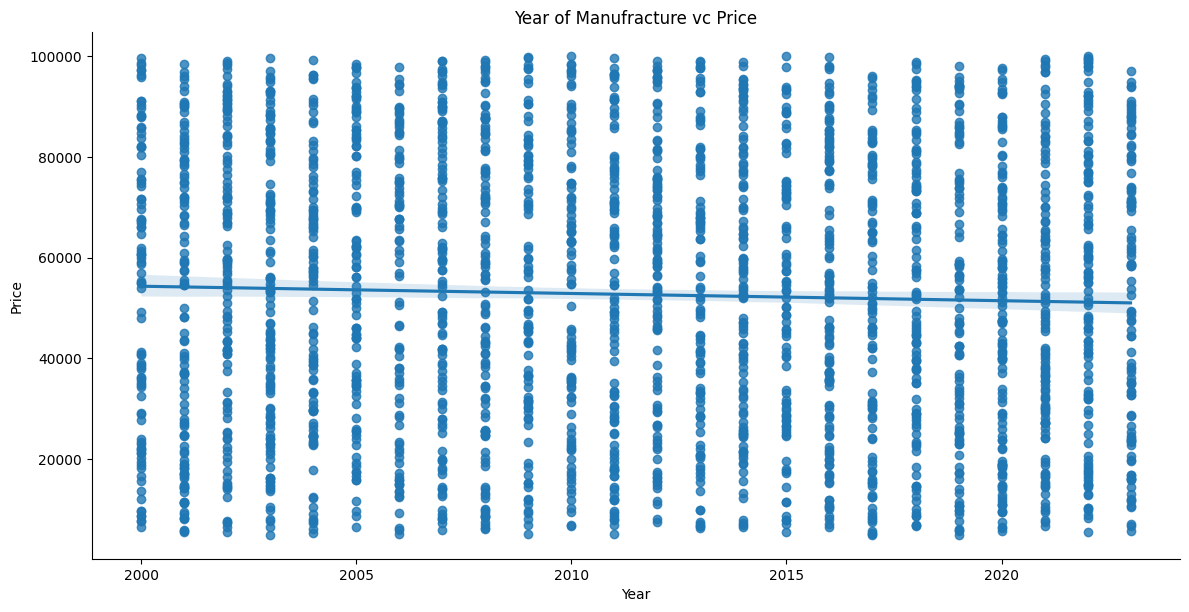

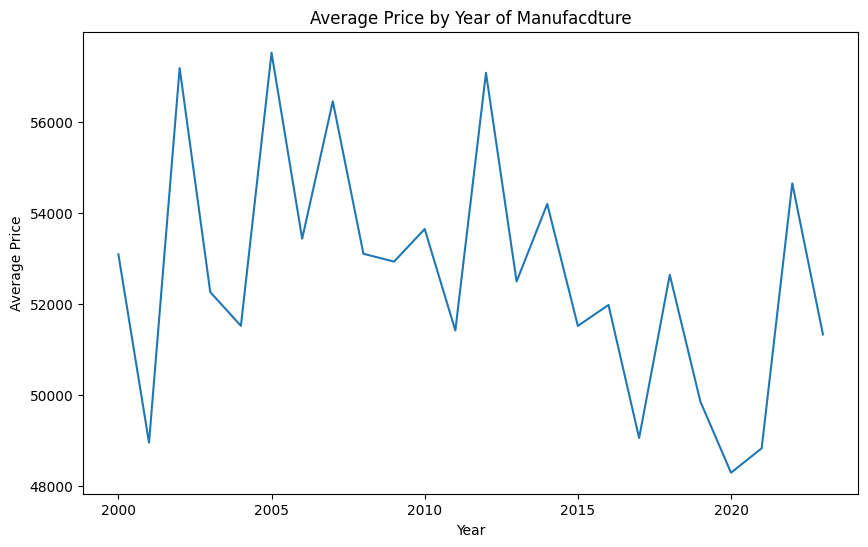

In [19]:
sns.lmplot(x='Year', y='Price', data=df, aspect=2, height=6)
plt.title("Year of Manufracture vc Price")
plt.show()

yearly_avg_price = df.groupby('Year', observed=True)['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Price', data=yearly_avg_price)
plt.title('Average Price by Year of Manufacdture')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

The year of manufacture seems to affect car prices,though inconsistently. The price drop during the 2008 financial crisis might reflect economic struggles, while the rise after 2010 could be linked to recovery and demand for newer models. The dip in 2020 likely reflects the COVID-19 pandemic's impact on production.However, pther factors might also be influencing these price changes.

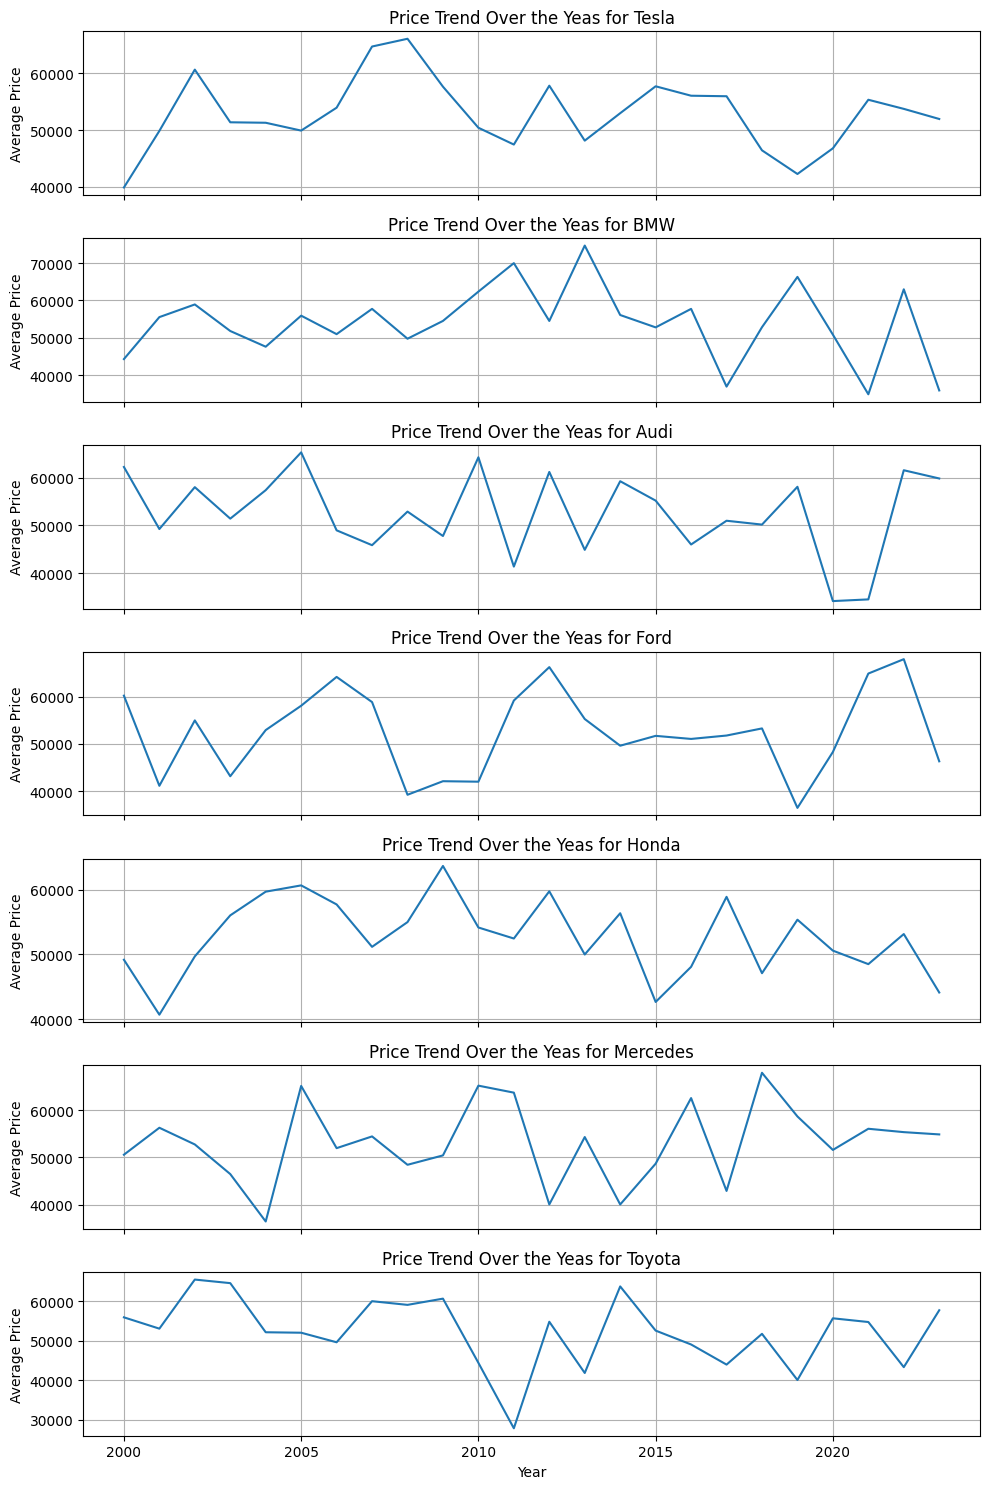

In [20]:
fig, axes = plt.subplots(len(brands), 1, figsize=(10,15), sharex=True)

for i, brand in enumerate (brands):
	brand_data = df[df['Brand']== brand]
	year_price = brand_data.groupby('Year', observed=True)['Price'].mean()
	sns.lineplot(x=year_price.index, y=year_price.values, ax=axes[i])
	axes[i].set_title(f'Price Trend Over the Yeas for {brand}')
	axes[i].set_ylabel('Average Price')
	axes[i].grid(True)

axes[-1].set_xlabel('Year')

plt.tight_layout()
plt.show()

### Trends for specific brands:

* Tesla: Tesla's average price shoows an upward trend, particularly after 2020. This could reflect increasing demand for electric vehicles. 

* BMW: BMW's price trend displays marked fluctuations, wth significant peaks around 2007 and 2015. The notable dips around 2009 and 2010may reflect the impact of the global financial crisis, which reduced demand for luxury vehicles.

* Audi: Audi's prices renain relatively stable, with minor fluctuations. There is a slight dip around 2015.

* Ford: Ford maintains a stable price trend overall, with a notable dip around 2018. Ford's prices also show an increase post-2020, likely due to pandemic-related supply chain disruptions and inflationary pressures.

* Honda: Honda's pricing shows remarkable stability, reflecting the brand's consistent focus on affordable, reliable vehicles.There is a minor fluctuations from 2010 to 2015.

* Mecedes: Mercedes demonstrates peaks and declines that align with economic cycles, similar to BMW. the decline around 2009 could correspond to decreased demand for luxury models with advanced technology and performance features. 

* Toyota: Toyota's trend is generally steady, with minor peaks and dips. There is a slight decline around 2015. The price rise ppost-2020 likely reflects increased demand for it's demand of eco-friendly models.

Each brand's trend reflects its positioning and response to external factors:
* Luxury Brands (e.g.,BMW, Mercedes) exhibit price sensivity to economic conditions and consumer interest in luxuray features.
* Mainstream Brands (e.g., Toyota, Ford, Honda) show stability with adjsutments in line with strategic shifts, such as ford's focus on SUVs. 

These patterns underscore how brand strategy and market conditions influence vehicle prices over time. 

# Engine Size

In [21]:
# Engine Size vs Price

engine_sizes = sorted([float(size) for size in df['Engine Size'].unique()])
print(f'Engine Sizes: {engine_sizes}')
print(f'Engine Size: {len(engine_sizes)}')

Engine Sizes: [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]
Engine Size: 51


In [22]:
price_by_engine_sizes = df.groupby(["Engine Size"])['Price'].mean().reset_index()

price_by_engine_sizes = price_by_engine_sizes.sort_values(by='Price', ascending=False)

price_by_engine_sizes

Engine Size         Price
0           1.0  63055.862174
39          4.9  60412.181818
12          2.2  60128.343036
40          5.0  59225.440189
14          2.4  58908.706275
22          3.2  58352.850200
26          3.6  58145.160250
41          5.1  58076.623684
21          3.1  57978.865536
47          5.7  57376.011698
8           1.8  56324.157833
27          3.7  56247.160784
48          5.8  56095.616346
35          4.5  55537.562857
43          5.3  55530.055682
3           1.3  55364.406377
34          4.4  54899.584107
13          2.3  54657.231304
24          3.4  54488.729615
6           1.6  54101.372791
28          3.8  54011.187800
17          2.7  53698.553833
7           1.7  53180.426458
9           1.9  52358.001633
38          4.8  52106.332679
49          5.9  51528.421429
18          2.8  51185.380217
36          4.6  51147.339211
37          4.7  50807.021800
11          2.1  50733.940926
33          4.3  50722.700682
46          5.6  50437.133846
10          2.0  50422.837255
2           1.2  50221.786875
25          3.5  50148.822195
50          6.0  50074.717600
29          3.9  50062.489385
16          2.6  49991.217358
15          2.5  49811.183542
42          5.2  49445.579592
31          4.1  49349.168444
1           1.1  49283.210000
20          3.0  49241.841475
4           1.4  49117.872407
19          2.9  47721.910000
5           1.5  47233.087907
45          5.5  46780.018636
23          3.3  46316.419556
30          4.0  44872.614211
44          5.4  44525.201765
32          4.2  44376.548980

             Engine Size     Price
Engine Size     1.000000 -0.063719
Price          -0.063719  1.000000


<Axes: xlabel='Engine Size', ylabel='Price'>

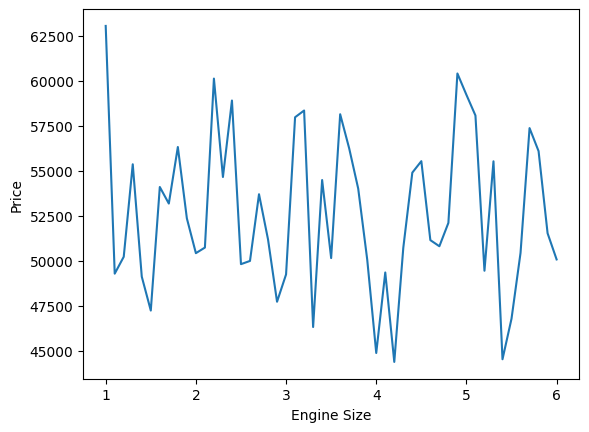

In [23]:
print(price_by_engine_sizes.corr())
sns.lineplot(x='Engine Size', y='Price',data=price_by_engine_sizes)

Based on the plot, there doesn't seem to be a strong linear relationship between the two variables.The correlation coefficient between Engine Size and Price is -0.064, which is very is close to zero. This suggests that there is almost no linear correlation between engine size and price in the dataset. Larger enzine sizes do not consistently correlate with higher or lower prices in this case.

So, we are gonna check how other factors along engine size affects the prize. 

### Brand and Engine Size and Price

In [24]:
price_by_engine_sizes_brand = df.groupby(['Brand', 'Fuel Type','Engine Size'], observed=True)['Price'].mean().reset_index()

price_by_engine_sizes_brand = price_by_engine_sizes_brand.sort_values(by='Price')

price_by_engine_sizes_brand

Brand Fuel Type  Engine Size     Price
550     Honda  Electric          1.7   5060.75
260       BMW    Hybrid          2.0   5124.89
652     Honda    Petrol          3.6   5129.96
961     Tesla    Hybrid          4.8   5765.54
347      Ford    Diesel          3.4   6483.01
..        ...       ...          ...       ...
583     Honda  Electric          6.0  99212.85
104      Audi    Hybrid          2.9  99541.32
364      Ford    Diesel          5.5  99605.33
832  Mercedes    Petrol          5.7  99754.42
960     Tesla    Hybrid          4.7  99794.46

[1183 rows x 4 columns]

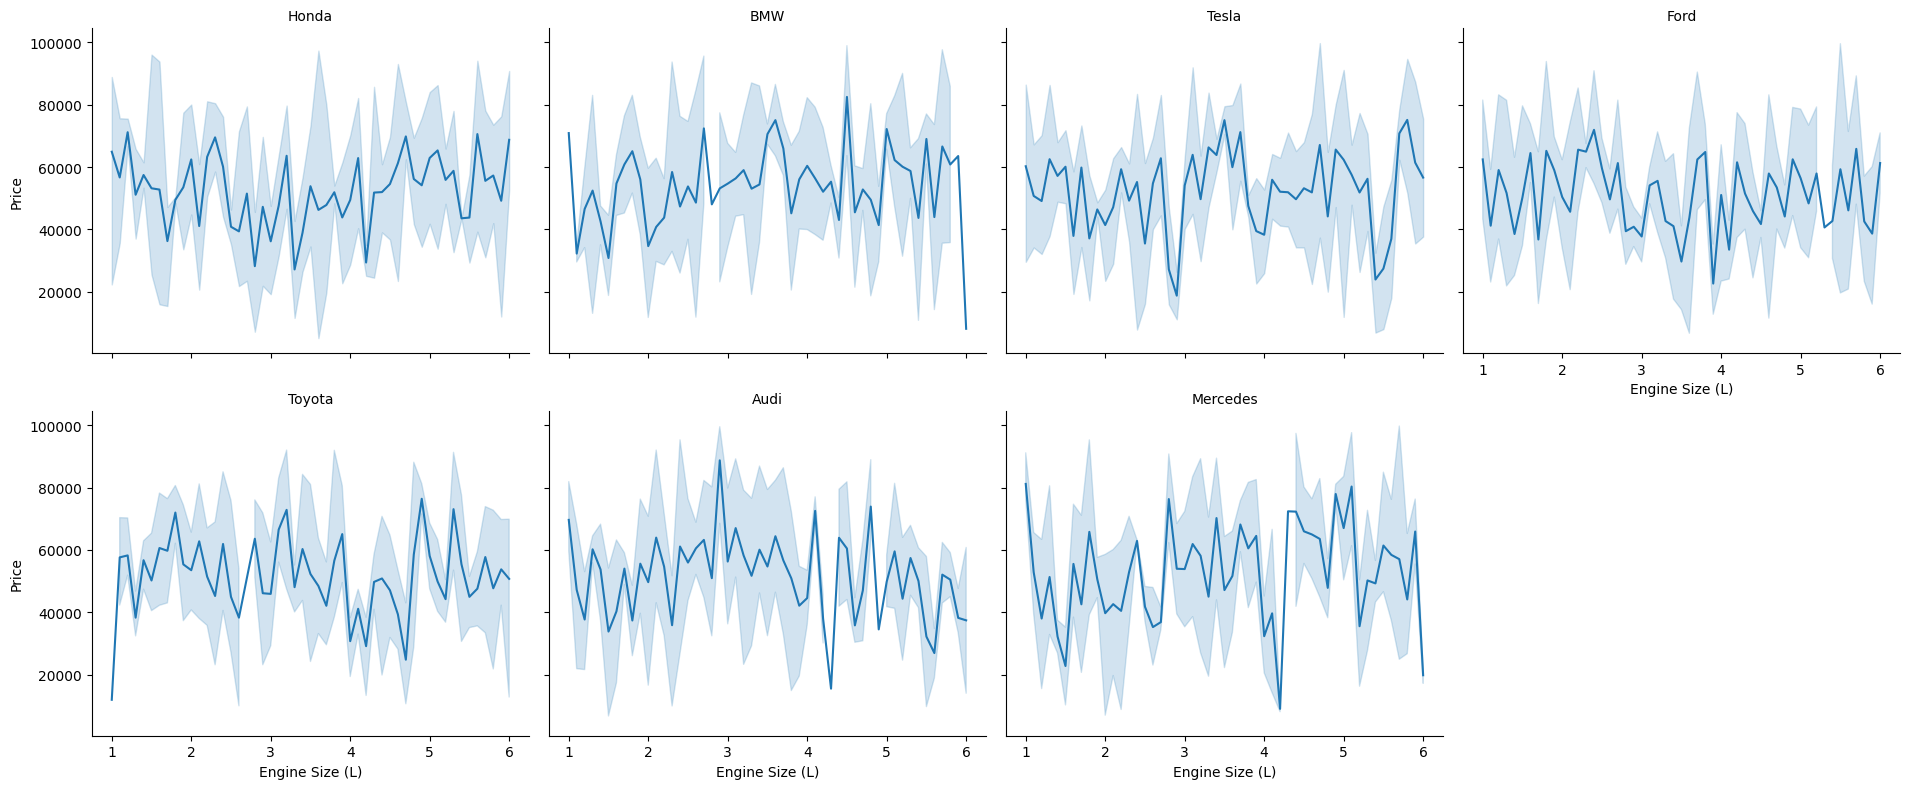

In [25]:
g = sns.FacetGrid(price_by_engine_sizes_brand, col="Brand", col_wrap=4, height=4, aspect=1.2) 
g.map(sns.lineplot, "Engine Size", "Price")

g.set_axis_labels("Engine Size (L)", "Price")
g.set_titles("{col_name}")

plt.tight_layout()

plt.show()

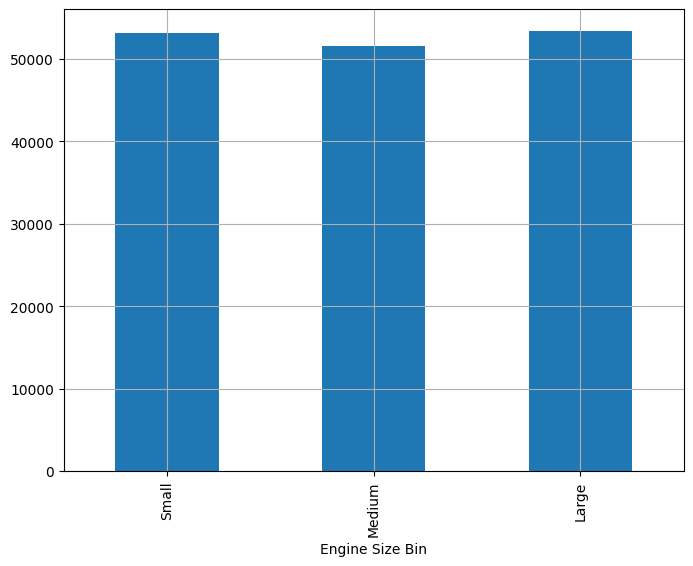

In [26]:
bin_labels = ["Small", "Medium", "Large"]
df["Engine Size Bin"] = pd.cut(df["Engine Size"], bins=3, labels=bin_labels)

avg_price_by_engine_size = df.groupby(["Engine Size Bin"], observed=True)["Price"].mean()

avg_price_by_engine_size.plot(kind="bar", figsize=(8, 6))
plt.grid(True)

In [27]:
correlation_engine = df["Engine Size"].corr(df["Price"])
print(f"Correlation between Engine Size and Price: {round(correlation_engine,5)}")
print(correlation_engine)

Correlation between Engine Size and Price: -0.00442
-0.00442022659353686


In [28]:
avg_price_by_engine_size.reset_index()

Engine Size Bin         Price
0           Small  53097.614690
1          Medium  51543.611123
2           Large  53340.319812

This indicates that there isn't a strict linear relationship between engine size and price. Instead the price seems to increase for both extemes,while the medium-sized engines may have a slightly lower price. 

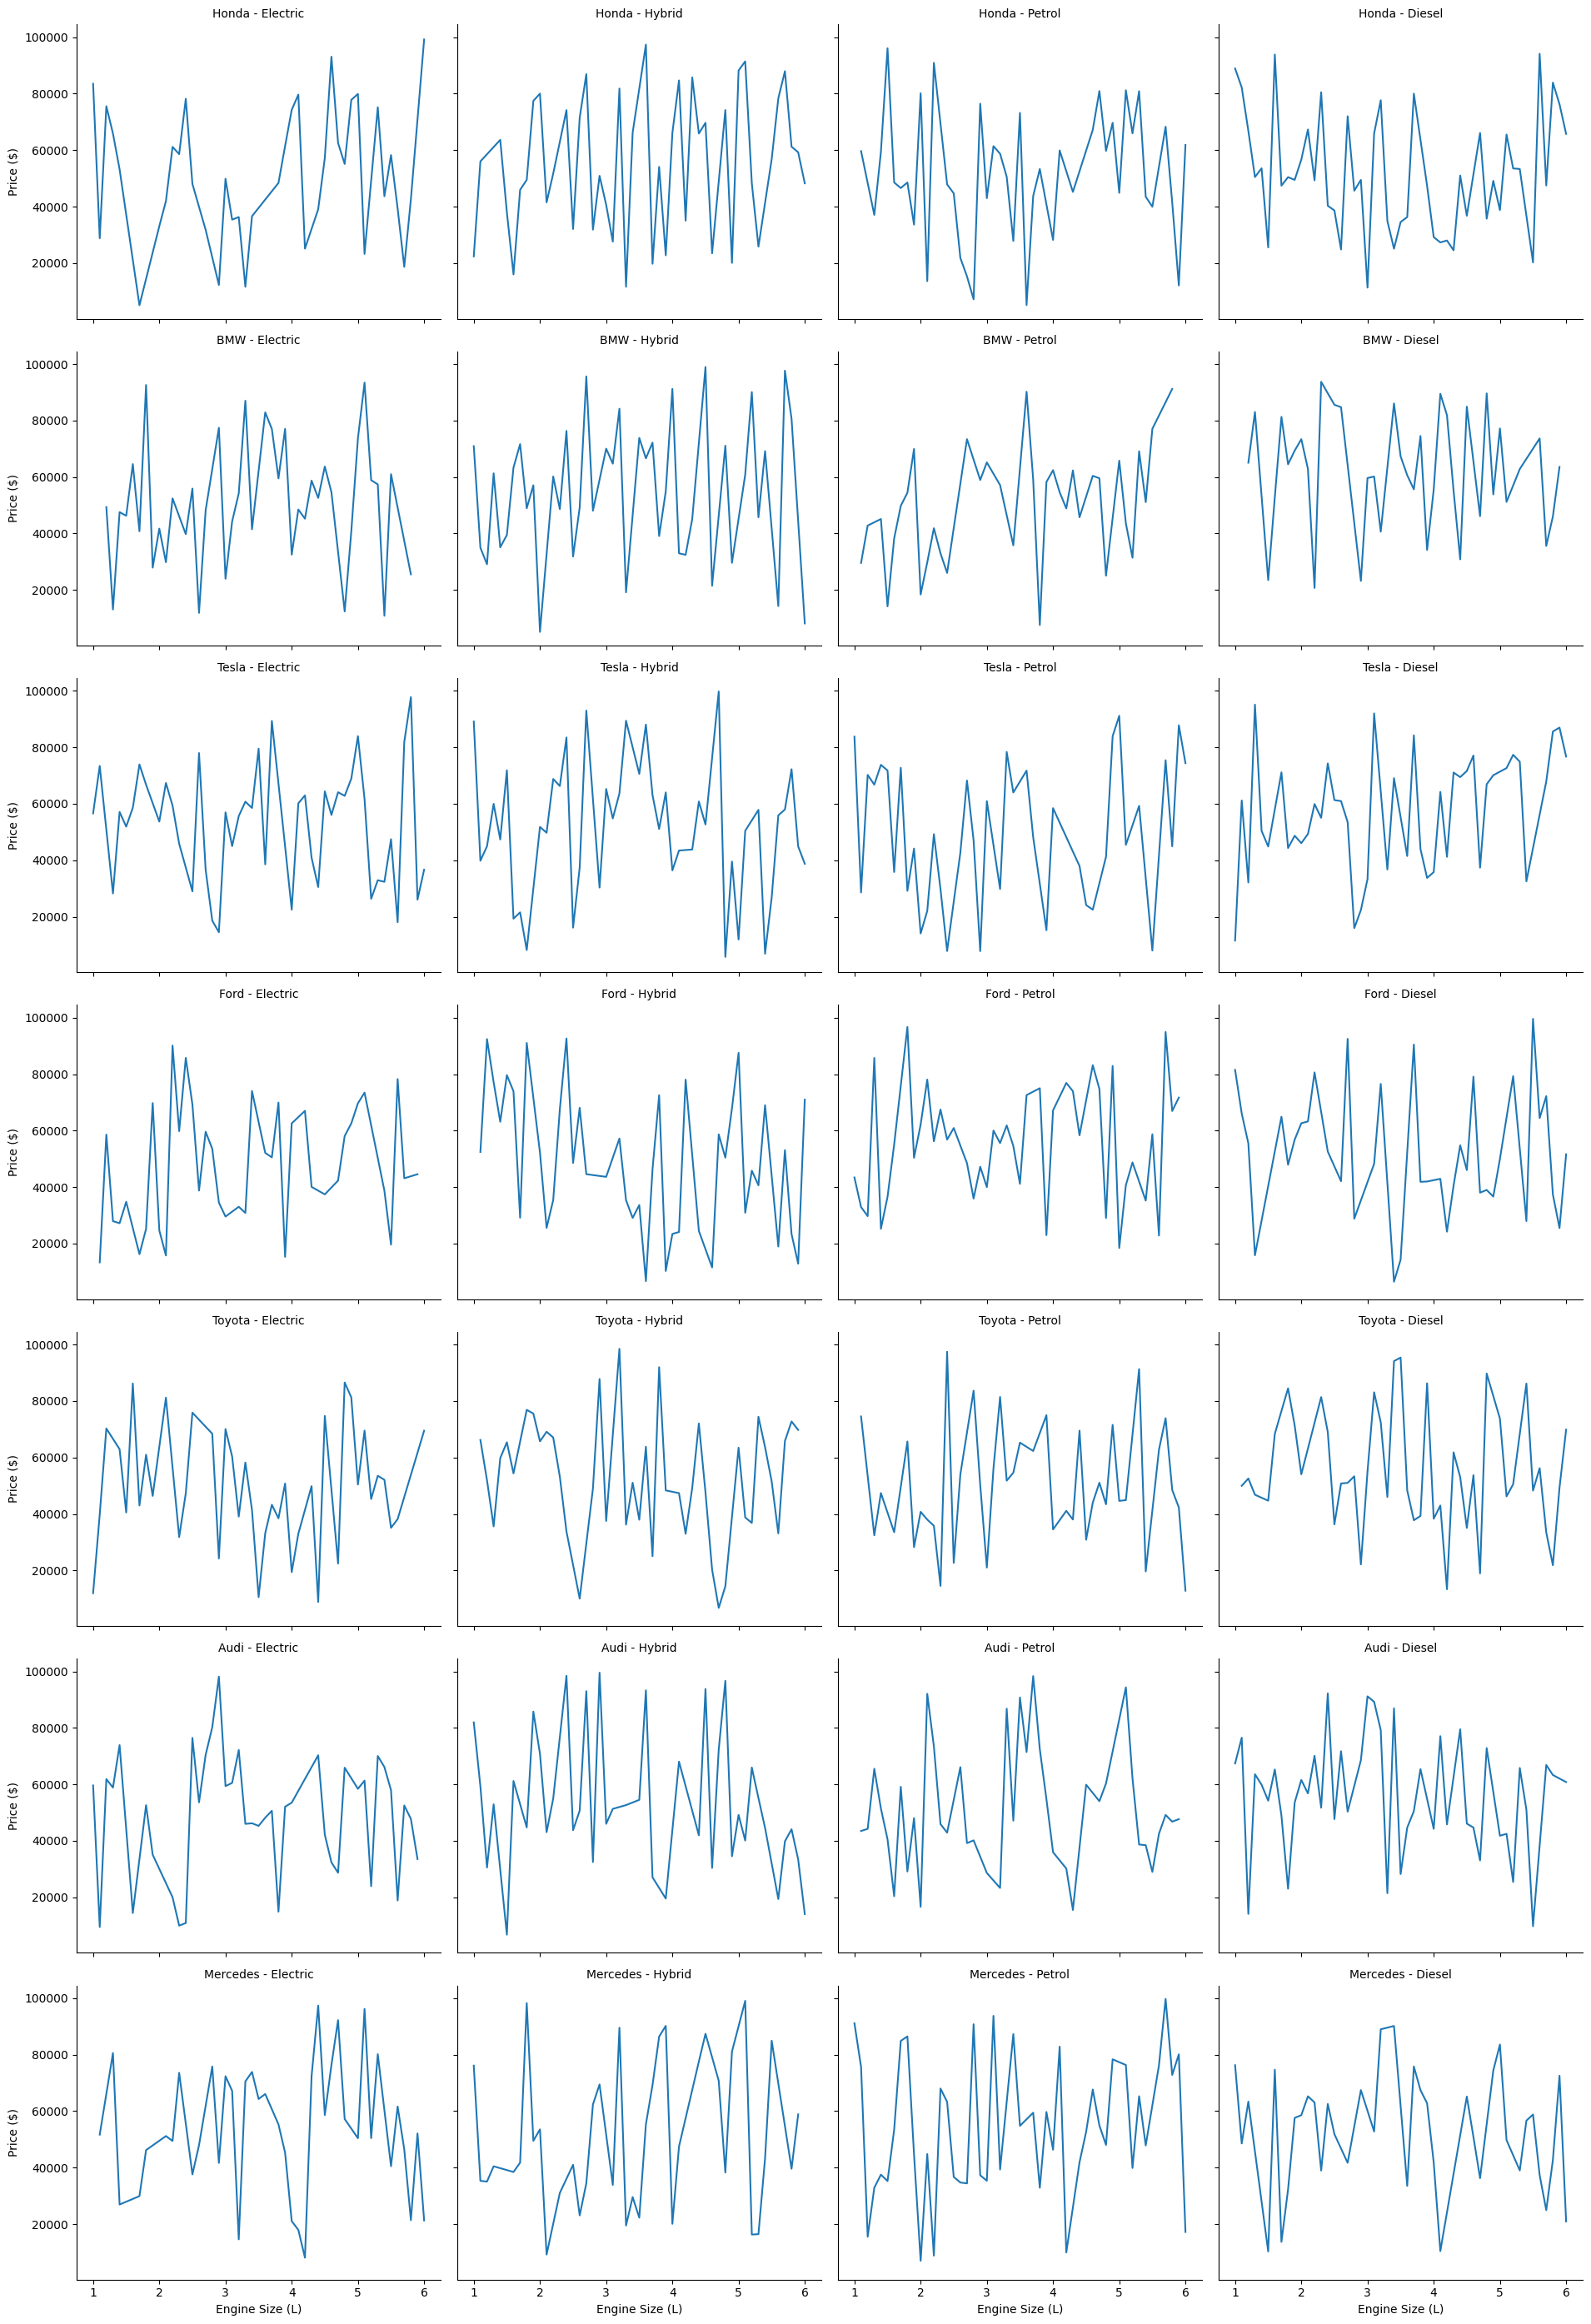

In [29]:
g = sns.FacetGrid(price_by_engine_sizes_brand, col="Fuel Type", row="Brand", height=4, aspect=1.2)

g.map(sns.lineplot, "Engine Size", "Price")

g.set_axis_labels("Engine Size (L)", "Price ($)")
g.set_titles(
    "{row_name} - {col_name}"
)  

plt.tight_layout()

plt.show()

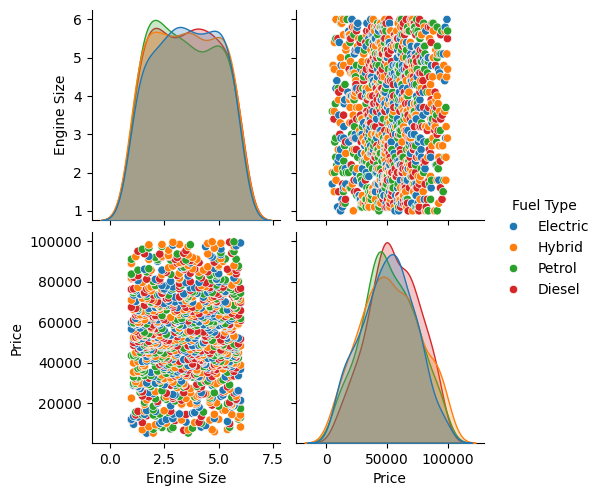

In [30]:
sns.pairplot(price_by_engine_sizes_brand[["Engine Size", "Price", "Fuel Type", "Brand"]], hue="Fuel Type")

# Show the plot
plt.show()

There is no clear or distinct pattern between Price and Brand when segmented by Fuel type. 

# Mileage vs Price

In [31]:
mileage = df['Mileage'].nunique()
print(mileage)

2490


In [32]:
price_by_mileage = df.groupby("Mileage", observed=True)['Price'].mean().reset_index()
price_by_mileage = price_by_mileage.sort_values(by='Price', ascending=True)

price_by_mileage


Mileage     Price
933    112684   5011.27
955    114463   5022.86
716     85366   5060.75
1351   161554   5107.22
1750   212373   5124.89
...       ...       ...
2233   271372  99605.33
1315   158502  99794.46
932    112557  99905.90
1366   162818  99968.62
375     44406  99982.59

[2490 rows x 2 columns]

<Axes: xlabel='Mileage', ylabel='Price'>

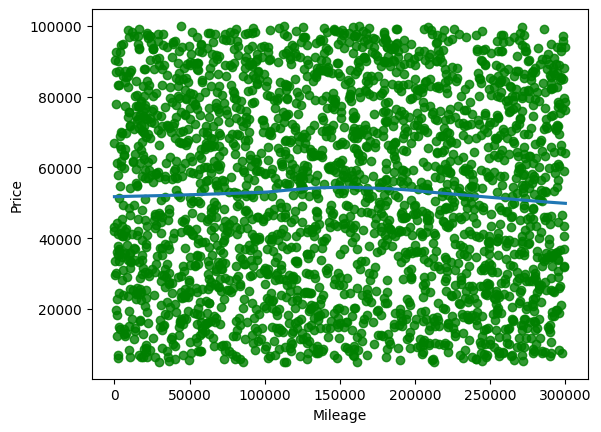

In [33]:
sns.regplot(x='Mileage', y='Price', data=price_by_mileage, lowess=True, scatter_kws={'color':'green'})

In [34]:
correlation_mileage = df['Mileage'].corr(df['Price'])
print(f'Correlation between Mileage and Price: {round(correlation_mileage,5)}')
print(correlation_mileage)

Correlation between Mileage and Price: -0.00857
-0.008567419950321715


There is almost no linear relationship between these two variables. We gonna check further by adding bins.

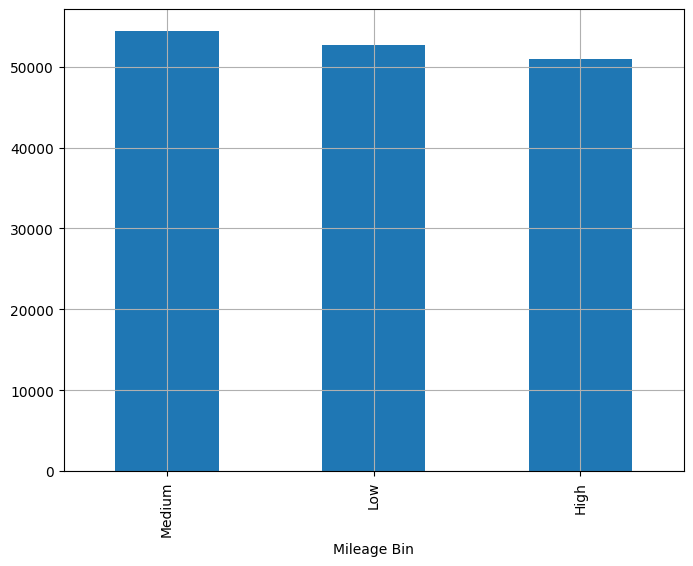

In [35]:
bin_labels = ['Low', 'Medium', 'High']
df['Mileage Bin'] = pd.cut(df['Mileage'], bins=3, labels=bin_labels)

avg_price_by_mileage = df.groupby(['Mileage Bin'], observed=True)['Price'].mean()
avg_price_by_mileage = avg_price_by_mileage.sort_values(ascending=False)

avg_price_by_mileage.plot(kind='bar', figsize=(8,6))
plt.grid(True)

In [36]:
avg_price_by_mileage.reset_index()

Mileage Bin         Price
0      Medium  54378.166242
1         Low  52656.040736
2        High  50929.498466

Mileage does influennce Price, it isn't a strict linear relationship. Cars with moderate mileage are priced higher than those with very low or very high mileage. 

## Fuel Type vs Price

In [37]:
fuel_type

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [38]:
price_by_fuel_type = df.groupby(['Fuel Type'], observed=True)['Price'].mean()
price_by_fuel_type = price_by_fuel_type.sort_values(ascending=False)

price_by_fuel_type.reset_index()

Fuel Type         Price
0    Diesel  54996.997588
1    Hybrid  52547.394759
2    Petrol  51767.918016
3  Electric  51103.013534

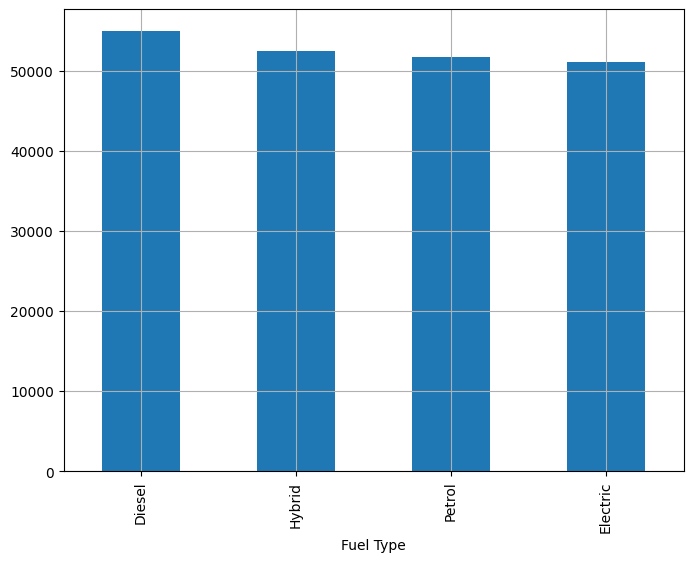

In [39]:
price_by_fuel_type.plot(kind='bar', figsize=(8,6))
plt.grid(True)

* Diesel has the highest average price, followed by Hybrid, Petrol, and Electtric. 
* The difference between the average prices are not extremely large, with Disel being about $3,500 more expensive than Hybrid and only around $1,000 more than Petrol and Electric.

In [40]:
price_by_fuel_brand = df.groupby(['Brand','Fuel Type'], observed=True)["Price"].mean().reset_index()
price_by_fuel_brand = price_by_fuel_brand.sort_values(by='Price', ascending=False)

(price_by_fuel_brand)

Brand Fuel Type         Price
4        BMW    Diesel  59334.373587
0       Audi    Diesel  56574.073814
20     Tesla    Diesel  56368.296818
6        BMW    Hybrid  55599.859302
24    Toyota    Diesel  55101.860280
14     Honda    Hybrid  55014.680805
16  Mercedes    Diesel  54449.243494
17  Mercedes  Electric  54237.306707
11      Ford    Petrol  54045.716813
19  Mercedes    Petrol  53719.672870
21     Tesla  Electric  53285.740600
8       Ford    Diesel  52679.123294
26    Toyota    Hybrid  52509.856875
23     Tesla    Petrol  52309.159067
10      Ford    Hybrid  52169.371628
15     Honda    Petrol  51919.030920
22     Tesla    Hybrid  51733.169529
1       Audi  Electric  51376.561170
7        BMW    Petrol  50992.418764
12     Honda    Diesel  50711.301262
5        BMW  Electric  50654.630879
13     Honda  Electric  50602.706667
2       Audi    Hybrid  50374.120000
18  Mercedes    Hybrid  50099.797125
25    Toyota  Electric  49961.358506
27    Toyota    Petrol  49928.105476
3       Audi    Petrol  49182.028125
9       Ford  Electric  47298.914706

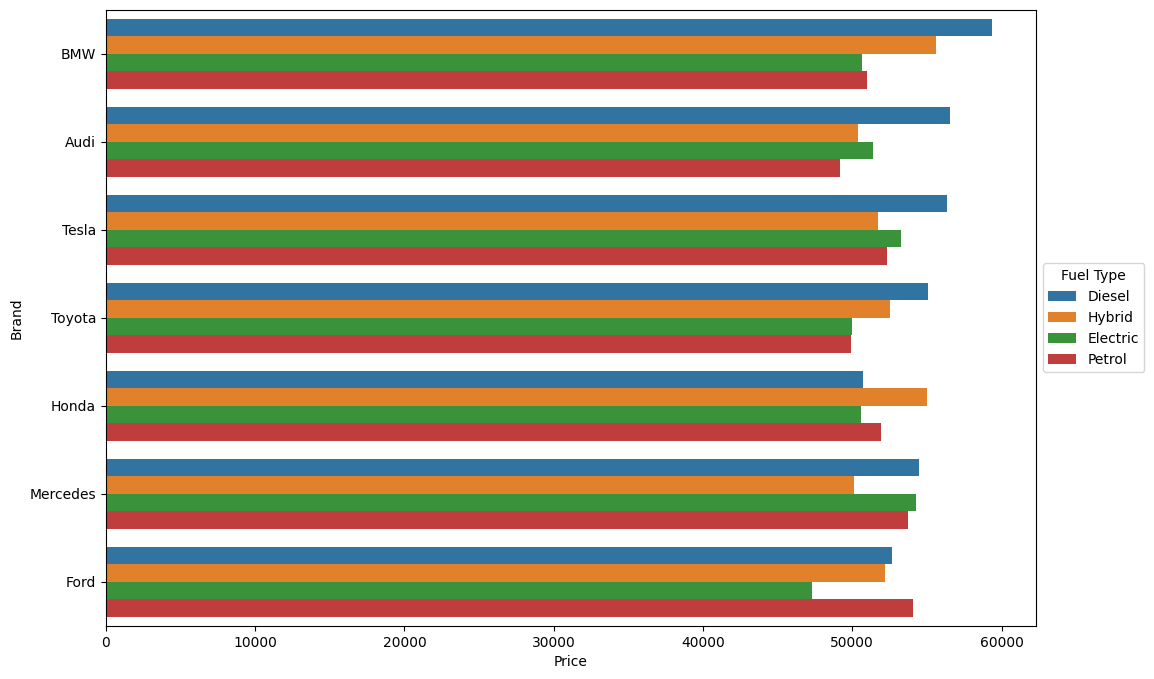

In [41]:
plt.figure(figsize=(12,8))

sns.barplot(data=price_by_fuel_brand, x='Price', y='Brand', hue='Fuel Type', dodge=True)

plt.legend(title="Fuel Type", loc="center left", bbox_to_anchor=(1, 0.5))

* Brand plays a significant role in pricing, where luxury brands like BMW, Mercedes, and Tesla have higher price points regardless of fuel type. 
* Fuel Type affects price, with Disel and Electric typically commanding higher pricees for certain brands, while Hybrid models offer  a middle ground. Petrol models tend to be cheaper for more mainstream brands.

## Transmission vs Price 

In [42]:
price_by_transmission = df.groupby('Transmission', observed=True)['Price'].mean()

price_by_transmission = price_by_transmission.sort_values(ascending=False)


price_by_transmission.reset_index()

Transmission         Price
0    Automatic  52691.684639
1       Manual  52589.119450

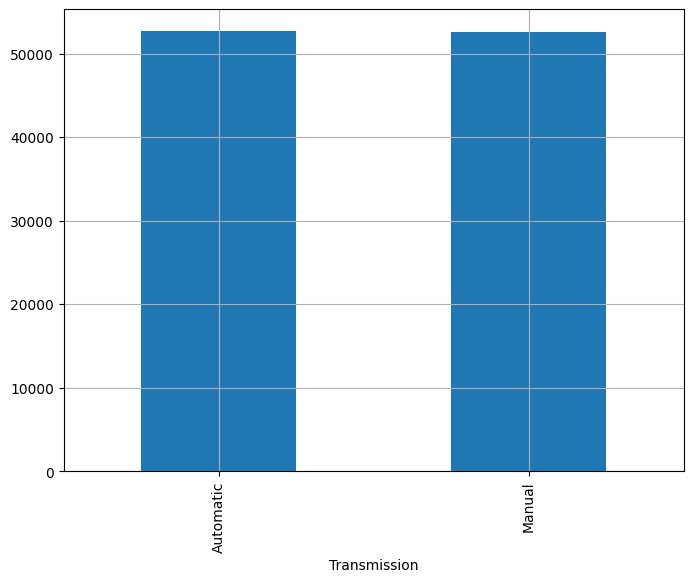

In [43]:
price_by_transmission.plot(kind='bar', figsize=(8,6))
plt.grid(True)

The difference between the two transmission types is minimal,suggestin that Transmissioon may not have a large impact on the prie for this dataset.

# Condition vs Price

In [44]:
price_by_condition = df.groupby('Condition', observed=True)['Price'].mean()
price_by_condition = price_by_condition.sort_values(ascending=True)

price_by_condition.reset_index()

Condition         Price
0       New  51904.509951
1      Used  52470.919076
2  Like New  53518.746376

<Axes: xlabel='Condition'>

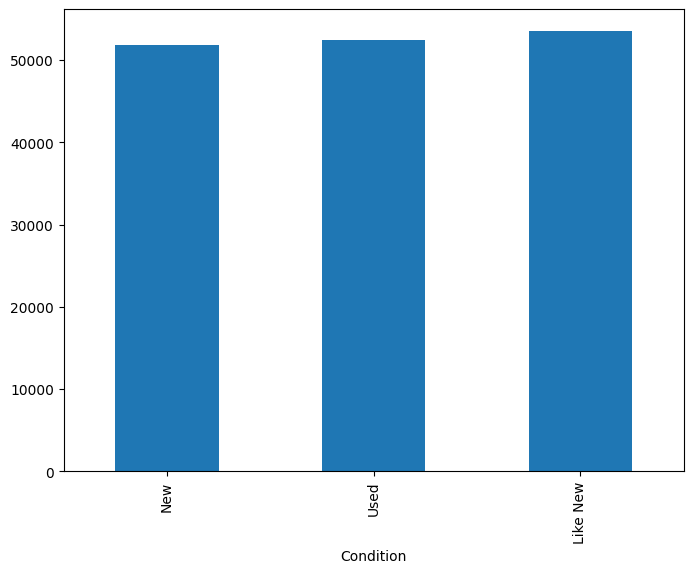

In [45]:
price_by_condition.plot(kind='bar', figsize=(8,6))

# Linear Model

### Creating Pipeline (for preprocessing and modeling)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Car ID           2500 non-null   int64   
 1   Brand            2500 non-null   object  
 2   Year             2500 non-null   int64   
 3   Engine Size      2500 non-null   float64 
 4   Fuel Type        2500 non-null   object  
 5   Transmission     2500 non-null   object  
 6   Mileage          2500 non-null   int64   
 7   Condition        2500 non-null   object  
 8   Price            2500 non-null   float64 
 9   Model            2500 non-null   object  
 10  Engine Size Bin  2500 non-null   category
 11  Mileage Bin      2500 non-null   category
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 200.6+ KB


In [47]:
X = df.drop(columns=["Car ID", "Price"])
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
		transformers=[
			('num', StandardScaler(), ['Mileage', 'Engine Size', 'Year']),
			('cat', OneHotEncoder(), ['Transmission','Brand','Fuel Type','Condition', 'Model'])
		]
	)




pipeline = Pipeline(steps=[
	('Preprocessor',preprocessor),
	('regressor', LinearRegression())
])
	

pipeline.fit(X_train, y_train) 

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Mileage', 'Engine Size',
                                                   'Year']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Transmission', 'Brand',
                                                   'Fuel Type', 'Condition',
                                                   'Model'])])),
                ('regressor', LinearRegression())])

In [49]:
# df_encoded = pd.get_dummies(df, columns=['Brand', 'Fuel Type', 'Condition', 'Model','Transmission'], drop_first=False)

# df_encoded.head()

In [50]:
# df_encoded.columns

In [51]:
model = pipeline.named_steps['regressor']

coeff = model.coef_
coeff


array([ -440.00286587,  -121.04327291, -1129.56537188,  -698.06898319,
         698.06898319,   -44.33511802,  1234.33698773,  -989.46236021,
       -1283.88813599,  -250.37299694,  1618.43634519,  -284.71472175,
        2180.21355281,  -897.9386295 ,    70.82227422, -1353.09719754,
          65.10293528,  -383.83622367,   318.73328839,  4162.76773952,
         845.73806827, -1489.34867346,  1536.26920294,  2848.79034405,
        -956.72759118, -5447.64332901,   148.87948304,   217.48852137,
        3166.43746879,  -224.81273509,  3014.07213544,  -414.49554276,
        1097.4763276 ,  5416.76656   , -6007.95904427,  6939.1263736 ,
       -1247.54302398,  1116.67966344, -1173.70330031,  2923.00300604,
       -9005.80551289, -2169.0973075 ,   515.12030935,  -606.37595686,
       -1430.93436608, -1548.34406317, -2225.82475689])

In [52]:
preprocessor = pipeline.named_steps['Preprocessor']

feature_names = preprocessor.transformers_[0][2] # Numeric
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(
    input_features=["Transmission", "Brand", "Fuel Type", "Condition", "Model"]
)

all_feature_names = list(feature_names) + list(cat_feature_names)

coef_df = pd.DataFrame(coeff, columns=['Coef'], index=all_feature_names)

coef_df

Coef
Mileage                 -440.002866
Engine Size             -121.043273
Year                   -1129.565372
Transmission_Automatic  -698.068983
Transmission_Manual      698.068983
Brand_Audi               -44.335118
Brand_BMW               1234.336988
Brand_Ford              -989.462360
Brand_Honda            -1283.888136
Brand_Mercedes          -250.372997
Brand_Tesla             1618.436345
Brand_Toyota            -284.714722
Fuel Type_Diesel        2180.213553
Fuel Type_Electric      -897.938629
Fuel Type_Hybrid          70.822274
Fuel Type_Petrol       -1353.097198
Condition_Like New        65.102935
Condition_New           -383.836224
Condition_Used           318.733288
Model_3 Series          4162.767740
Model_5 Series           845.738068
Model_A3               -1489.348673
Model_A4                1536.269203
Model_Accord            2848.790344
Model_C-Class           -956.727591
Model_CR-V             -5447.643329
Model_Camry              148.879483
Model_Civic              217.488521
Model_Corolla           3166.437469
Model_E-Class           -224.812735
Model_Explorer          3014.072135
Model_Fiesta            -414.495543
Model_Fit               1097.476328
Model_Focus             5416.766560
Model_GLA              -6007.959044
Model_GLC               6939.126374
Model_Model 3          -1247.543024
Model_Model S           1116.679663
Model_Model X          -1173.703300
Model_Model Y           2923.003006
Model_Mustang          -9005.805513
Model_Prius            -2169.097307
Model_Q5                 515.120309
Model_Q7                -606.375957
Model_RAV4             -1430.934366
Model_X3               -1548.344063
Model_X5               -2225.824757

In [53]:
predictions = pipeline.predict(X_test)
predictions

array([55189.69633803, 52848.86738319, 53841.92321735, 52717.98027323,
       52054.30438777, 51908.5515896 , 49519.7229752 , 54159.71208477,
       52916.09331449, 52751.74325777, 54345.6601989 , 50513.86271941,
       54781.52128637, 55894.87790918, 53746.22913073, 49710.34126823,
       50557.49194062, 58651.88811253, 52102.39383566, 60888.30618018,
       51927.81256898, 52587.75305176, 49531.40052142, 52116.75697025,
       51568.05863815, 47659.65186144, 59413.42197643, 53456.64734844,
       47510.83897814, 53907.93346256, 54891.62775984, 51666.8242043 ,
       50825.95380835, 53328.09058198, 44581.88086567, 45452.65748787,
       51605.38636617, 39850.85091583, 50798.53186758, 53754.29540616,
       52946.70554612, 55213.25332196, 55202.43562695, 40794.14959805,
       53085.15524222, 52778.21638603, 49671.03778799, 55278.38181452,
       53782.88684101, 43645.52663683, 55209.91318999, 52378.90411656,
       51210.66072765, 47925.78053525, 49542.17624483, 45749.84172401,
      

<Axes: ylabel='Price'>

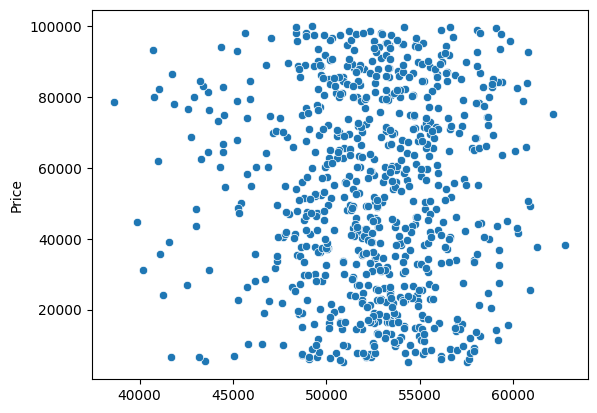

In [54]:
sns.scatterplot(x=predictions, y=y_test)

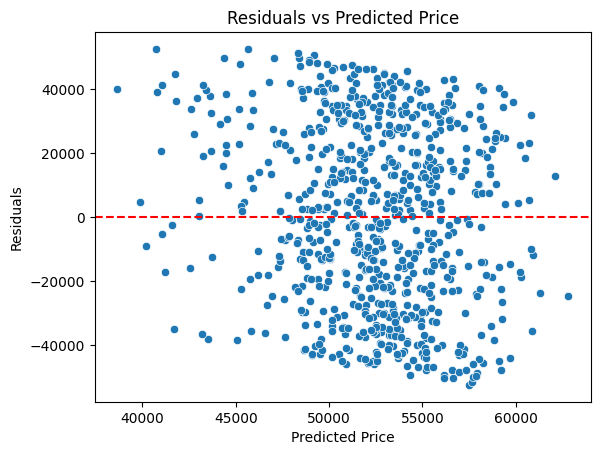

In [55]:
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title("Residuals vs Predicted Price")
plt.show()

In [56]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test,predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error: 24051.70735266143
Mean Squared Error: 774429320.6395737
RMSE:  27828.57022269692


In [57]:
df['Price'].mean()

np.float64(52638.022532)

In [58]:
mean_residual = residuals.mean()
print(f'Mean of residual:',mean_residual)

Mean of residual: 480.31647539827554


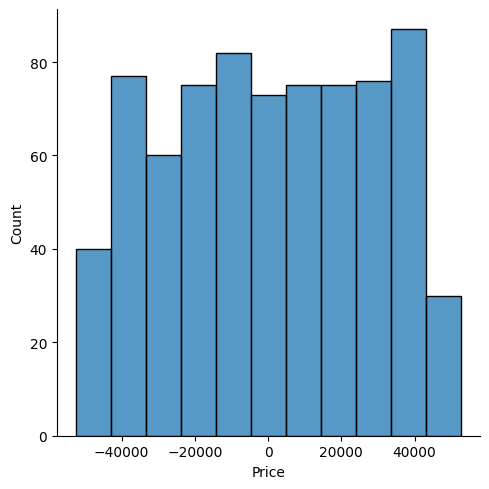

In [59]:
sns.displot(residuals)

### Saving the model

In [60]:
# with open("car_price_model.pkl", "wb") as file:
#     pickle.dump(pipeline, file)

In [61]:
# with open("preprocessor.pkl", 'wb') as file:
# 	pickle.dump(preprocessor, file)

### XGBRegressor

In [63]:
import  xgboost as xgb

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Mileage", "Engine Size", "Year"]),
        (
            "cat",
            OneHotEncoder(),
            ["Transmission", "Brand", "Fuel Type", "Condition", "Model"],
        ),
    ]
)

xPipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", xgb.XGBRegressor(objective="reg:squarederror")),
    ]
)

In [64]:
xPipeline.fit(X_train, y_train)

xPredictions = xPipeline.predict(X_test)

xPredictions

array([66178.62  , 21828.086 , 42523.426 , 56045.223 ,  8827.032 ,
       36207.26  , 72358.95  , 42025.145 , 65238.707 , 56509.836 ,
       42120.57  , 25377.125 , 63162.867 , 41841.137 , 54663.25  ,
       39303.34  , 49902.17  , 58483.75  , 49975.223 , 49440.07  ,
       59565.484 , 53440.51  , 50450.508 , 49788.15  , 31475.945 ,
       56133.89  , 55232.59  , 74302.234 , 51809.46  , 37528.266 ,
       45974.836 , 36303.816 , 70000.56  , 30455.559 , 42778.664 ,
       37523.387 , 28621.564 , 45826.93  , 37542.383 , 25470.924 ,
       42069.74  , 41431.484 , 47066.12  , 48897.04  , 55154.47  ,
       39597.93  , 41828.55  , 58064.51  , 41258.8   , 57284.22  ,
       49847.09  , 51029.367 , 68582.5   , 47220.97  , 41928.89  ,
       58815.34  , 42125.125 , 65756.09  , 54583.336 , 58055.31  ,
       61351.99  , 38507.24  , 85091.82  , 37750.797 , 59904.715 ,
       72411.2   , 57245.45  , 67964.33  , 50247.945 , 51504.86  ,
       45157.637 , 60255.625 , 27868.53  , 22894.613 , 69630.5

### Compaarison 

In [65]:
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

print("XGBRegressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, xPredictions))
print("Mean Squared Error:", mean_squared_error(y_test, xPredictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, xPredictions)))

Linear Regression:
Mean Absolute Error: 24051.70735266143
Mean Squared Error: 774429320.6395737
RMSE:  27828.57022269692
XGBRegressor:
Mean Absolute Error: 26345.68163296875
Mean Squared Error: 989918529.3467937
RMSE:  31462.970764802132
